In [1]:
# Save the GeoDataFrame to a CSV file
import pandas as pd

df_countries_full = pd.read_csv('world_countries_full-data.csv')
print(df_countries_full.shape)
df_countries_full.head(2)

(251, 54)


,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,...,Indonesien,Endonezya,Indonesia,?????,Indonesia,NaN,EAP,495.029918,153.078608,MULTIPOLYGON (((117.7036079042814 4.1634145420...
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,...,Malaysia,Malezya,Malaysia,????,Malaysia,NaN,EAP,68.456913,26.703172,MULTIPOLYGON (((117.7036079042814 4.1634145420...


In [6]:
df_countries_full.columns

Index(['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN',
       'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR',
       'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [38]:
df_countries_full[['FIPS_10_', 'ISO_A2','ISO_A3', 'UN_A3',  'NAME_EN', 'NAME_FR', 'WB_NAME', 'FORMAL_EN',  'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB', 'WB_REGION', 'TYPE', 'ECONOMY', 'INCOME_GRP',
     'Shape_Leng',  'Shape_Area' ,'geometry']].head(1)

,FIPS_10_,ISO_A2,ISO_A3,UN_A3,NAME_EN,NAME_FR,WB_NAME,FORMAL_EN,CONTINENT,REGION_UN,SUBREGION,REGION_WB,WB_REGION,TYPE,ECONOMY,INCOME_GRP,Shape_Leng,Shape_Area,geometry
0,ID,ID,IDN,360,Indonesia,Indonésie,Indonesia,Republic of Indonesia,Asia,Asia,South-Eastern Asia,East Asia & Pacific,EAP,Sovereign country,4. Emerging region: MIKT,4. Lower middle income,495.029918,153.078608,MULTIPOLYGON (((117.7036079042814 4.1634145420...


In [42]:
# Sort the DataFrame by the 'ISO_A3' column
df_countries_sorted = df_countries_full[['FIPS_10_', 'ISO_A2', 'ISO_A3', 'UN_A3', 'NAME_EN', 'NAME_FR', 'WB_NAME',
                                          'FORMAL_EN', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB', 'WB_REGION',
                                            'TYPE', 'ECONOMY', 'INCOME_GRP', 
                                            'Shape_Leng', 'Shape_Area', 'geometry']].sort_values(by='NAME_EN')

# Display the first few rows
df_countries_sorted.head(5)


,FIPS_10_,ISO_A2,ISO_A3,UN_A3,NAME_EN,NAME_FR,WB_NAME,FORMAL_EN,CONTINENT,REGION_UN,SUBREGION,REGION_WB,WB_REGION,TYPE,ECONOMY,INCOME_GRP,Shape_Leng,Shape_Area,geometry
125,AF,AF,AFG,4,Afghanistan,Afghanistan,Afghanistan,Islamic State of Afghanistan,Asia,Asia,Southern Asia,South Asia,SOA,Sovereign country,7. Least developed region,5. Low income,52.765827,62.591664,POLYGON ((74.54235396256536 37.021669006319655...
60,AL,AL,ALB,8,Albania,Albanie,Albania,Republic of Albania,Europe,Europe,Southern Europe,Europe & Central Asia,ECA,Sovereign country,6. Developing region,4. Lower middle income,11.050457,3.039395,POLYGON ((20.567147257839736 41.87318166170439...
117,AG,DZ,DZA,12,Algeria,Algérie,Algeria,People's Democratic Republic of Algeria,Africa,Africa,Northern Africa,Middle East & North Africa,MENA,Sovereign country,6. Developing region,3. Upper middle income,71.641687,212.690941,POLYGON ((6.5832625658148345 36.98981354366015...
227,AQ,AS,ASM,16,American Samoa,Samoa américaines,American Samoa (US),American Samoa,Oceania,Oceania,Polynesia,East Asia & Pacific,Other,Dependency,6. Developing region,3. Upper middle income,1.073705,0.015101,MULTIPOLYGON (((-170.59101315013675 -14.264825...
124,AN,AD,AND,20,Andorra,Andorre,Andorra,Principality of Andorra,Europe,Europe,Southern Europe,Europe & Central Asia,Other,Sovereign country,2. Developed region: nonG7,2. High income: nonOECD,1.057953,0.049561,POLYGON ((1.7070064699726686 42.50278147418572...


In [82]:
df_countries_meta_geodata = df_countries_sorted.copy()
print(df_countries_meta_geodata.columns)
print(df_countries_meta_geodata.shape)
df_countries_meta_geodata.head()

Index(['FIPS_10_', 'ISO_A2', 'ISO_A3', 'UN_A3', 'NAME_EN', 'NAME_FR',
       'WB_NAME', 'FORMAL_EN', 'CONTINENT', 'REGION_UN', 'SUBREGION',
       'REGION_WB', 'WB_REGION', 'TYPE', 'ECONOMY', 'INCOME_GRP', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')
(251, 19)


,FIPS_10_,ISO_A2,ISO_A3,UN_A3,NAME_EN,NAME_FR,WB_NAME,FORMAL_EN,CONTINENT,REGION_UN,SUBREGION,REGION_WB,WB_REGION,TYPE,ECONOMY,INCOME_GRP,Shape_Leng,Shape_Area,geometry
125,AF,AF,AFG,4,Afghanistan,Afghanistan,Afghanistan,Islamic State of Afghanistan,Asia,Asia,Southern Asia,South Asia,SOA,Sovereign country,7. Least developed region,5. Low income,52.765827,62.591664,POLYGON ((74.54235396256536 37.021669006319655...
60,AL,AL,ALB,8,Albania,Albanie,Albania,Republic of Albania,Europe,Europe,Southern Europe,Europe & Central Asia,ECA,Sovereign country,6. Developing region,4. Lower middle income,11.050457,3.039395,POLYGON ((20.567147257839736 41.87318166170439...
117,AG,DZ,DZA,12,Algeria,Algérie,Algeria,People's Democratic Republic of Algeria,Africa,Africa,Northern Africa,Middle East & North Africa,MENA,Sovereign country,6. Developing region,3. Upper middle income,71.641687,212.690941,POLYGON ((6.5832625658148345 36.98981354366015...
227,AQ,AS,ASM,16,American Samoa,Samoa américaines,American Samoa (US),American Samoa,Oceania,Oceania,Polynesia,East Asia & Pacific,Other,Dependency,6. Developing region,3. Upper middle income,1.073705,0.015101,MULTIPOLYGON (((-170.59101315013675 -14.264825...
124,AN,AD,AND,20,Andorra,Andorre,Andorra,Principality of Andorra,Europe,Europe,Southern Europe,Europe & Central Asia,Other,Sovereign country,2. Developed region: nonG7,2. High income: nonOECD,1.057953,0.049561,POLYGON ((1.7070064699726686 42.50278147418572...


In [4]:
#!pip install python-restcountries
#https://github.com/SteinRobert/python-restcountries

In [2]:
import pandas as pd

df_countries_api = pd.read_csv('world_countries_restapi-data.csv')
print(df_countries_api.shape)
df_countries_api.head(1)

(250, 23)


,Top Level Domain,Currencies,Capital,Calling Codes,Alt Spellings,Relevance,Region,Subregion,Translations,Population,...,Gini,Timezones,Borders,Native Name,Name,Numeric Code,Languages,Flag,Regional Blocs,CIOC
0,['.af'],"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...",Kabul,['93'],"['AF', 'Afġānistān']",NaN,Asia,Southern Asia,"{'br': 'Afghanistan', 'pt': 'Afeganistão', 'nl...",40218234,...,NaN,['UTC+04:30'],"['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN']",افغانستان,Afghanistan,4,"[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...",https://upload.wikimedia.org/wikipedia/commons...,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG


In [19]:
df_countries_api.columns

Index(['Top Level Domain', 'Currencies', 'Capital', 'Calling Codes',
       'Alt Spellings', 'Relevance', 'Region', 'Subregion', 'Translations',
       'Population', 'Latlng', 'Demonym', 'Area', 'Gini', 'Timezones',
       'Borders', 'Native Name', 'Name', 'Numeric Code', 'Languages', 'Flag',
       'Regional Blocs', 'CIOC'],
      dtype='object')

In [64]:
excluded_api_cols = ['Relevance', 'Gini', 'Population']

retain_api_cols = ['Numeric Code', 'Calling Codes', 'CIOC', 'Top Level Domain', 'Name', 'Native Name', 'Demonym', 
        'Capital', 'Region', 'Subregion', 'Timezones',  'Currencies', 'Alt Spellings', 'Languages', 
        'Translations',  'Borders',  'Regional Blocs', 'Latlng', 'Area',  'Flag']

In [68]:
len(retain_api_cols), len(excluded_api_cols) 

(20, 3)

In [81]:
df_countries_api_refactor = df_countries_api[retain_api_cols]
print(df_countries_api_refactor.columns)
df_countries_api_refactor.head()

Index(['Numeric Code', 'Calling Codes', 'CIOC', 'Top Level Domain', 'Name',
       'Native Name', 'Demonym', 'Capital', 'Region', 'Subregion', 'Timezones',
       'Currencies', 'Alt Spellings', 'Languages', 'Translations', 'Borders',
       'Regional Blocs', 'Latlng', 'Area', 'Flag'],
      dtype='object')


,Numeric Code,Calling Codes,CIOC,Top Level Domain,Name,Native Name,Demonym,Capital,Region,Subregion,Timezones,Currencies,Alt Spellings,Languages,Translations,Borders,Regional Blocs,Latlng,Area,Flag
0,4,['93'],AFG,['.af'],Afghanistan,افغانستان,Afghan,Kabul,Asia,Southern Asia,['UTC+04:30'],"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","['AF', 'Afġānistān']","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'br': 'Afghanistan', 'pt': 'Afeganistão', 'nl...","['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN']","[{'acronym': 'SAARC', 'name': 'South Asian Ass...","[33.0, 65.0]",652230.0,https://upload.wikimedia.org/wikipedia/commons...
1,248,['358'],NaN,['.ax'],Åland Islands,Åland,Ålandish,Mariehamn,Europe,Northern Europe,['UTC+02:00'],"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","['AX', 'Aaland', 'Aland', 'Ahvenanmaa']","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","{'br': 'Åland', 'pt': 'Ilhas de Aland', 'nl': ...",NaN,"[{'acronym': 'EU', 'name': 'European Union'}]","[60.116667, 19.9]",1580.0,https://flagcdn.com/ax.svg
2,8,['355'],ALB,['.al'],Albania,Shqipëria,Albanian,Tirana,Europe,Southern Europe,['UTC+01:00'],"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","['AL', 'Shqipëri', 'Shqipëria', 'Shqipnia']","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'br': 'Albania', 'pt': 'Albânia', 'nl': 'Alba...","['MNE', 'GRC', 'MKD', 'UNK']","[{'acronym': 'CEFTA', 'name': 'Central Europea...","[41.0, 20.0]",28748.0,https://flagcdn.com/al.svg
3,12,['213'],ALG,['.dz'],Algeria,الجزائر,Algerian,Algiers,Africa,Northern Africa,['UTC+01:00'],"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","['DZ', 'Dzayer', 'Algérie']","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'br': 'Aljeria', 'pt': 'Argélia', 'nl': 'Alge...","['TUN', 'LBY', 'NER', 'ESH', 'MRT', 'MLI', 'MAR']","[{'acronym': 'AU', 'name': 'African Union', 'o...","[28.0, 3.0]",2381741.0,https://flagcdn.com/dz.svg
4,16,['1'],ASA,['.as'],American Samoa,American Samoa,American Samoan,Pago Pago,Oceania,Polynesia,['UTC-11:00'],"[{'code': 'USD', 'name': 'United States Dollar...","['AS', 'Amerika Sāmoa', 'Amelika Sāmoa', 'Sāmo...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'br': 'Samoa Amerikan', 'pt': 'Samoa American...",NaN,NaN,"[-14.33333333, -170.0]",199.0,https://flagcdn.com/as.svg


In [85]:
# Perform a left join on 'UN_A3' and 'Numeric Code'
df_merged_metaGeoApi = df_countries_meta_geodata.merge(
    df_countries_api_refactor, 
    left_on='UN_A3', 
    right_on='Numeric Code', 
    how='left'
)

# Display the first few rows of the merged DataFrame
print(df_merged_metaGeoApi.shape)
df_merged_metaGeoApi.head(1)


(251, 39)


,FIPS_10_,ISO_A2,ISO_A3,UN_A3,NAME_EN,NAME_FR,WB_NAME,FORMAL_EN,CONTINENT,REGION_UN,...,Timezones,Currencies,Alt Spellings,Languages,Translations,Borders,Regional Blocs,Latlng,Area,Flag
0,AF,AF,AFG,4,Afghanistan,Afghanistan,Afghanistan,Islamic State of Afghanistan,Asia,Asia,...,['UTC+04:30'],"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","['AF', 'Afġānistān']","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'br': 'Afghanistan', 'pt': 'Afeganistão', 'nl...","['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN']","[{'acronym': 'SAARC', 'name': 'South Asian Ass...","[33.0, 65.0]",652230.0,https://upload.wikimedia.org/wikipedia/commons...


In [86]:
print(df_merged_metaGeoApi.columns)

Index(['FIPS_10_', 'ISO_A2', 'ISO_A3', 'UN_A3', 'NAME_EN', 'NAME_FR',
       'WB_NAME', 'FORMAL_EN', 'CONTINENT', 'REGION_UN', 'SUBREGION',
       'REGION_WB', 'WB_REGION', 'TYPE', 'ECONOMY', 'INCOME_GRP', 'Shape_Leng',
       'Shape_Area', 'geometry', 'Numeric Code', 'Calling Codes', 'CIOC',
       'Top Level Domain', 'Name', 'Native Name', 'Demonym', 'Capital',
       'Region', 'Subregion', 'Timezones', 'Currencies', 'Alt Spellings',
       'Languages', 'Translations', 'Borders', 'Regional Blocs', 'Latlng',
       'Area', 'Flag'],
      dtype='object')


In [91]:
# Display all columns
pd.set_option('display.max_columns', None)

df_merged_metaGeoApi[['FIPS_10_', 'ISO_A2', 'ISO_A3', 'UN_A3', 'NAME_EN', 'NAME_FR',
       'WB_NAME', 'FORMAL_EN', 'CONTINENT', 'REGION_UN', 'SUBREGION',
       'REGION_WB', 'WB_REGION', 'TYPE', 'ECONOMY', 'INCOME_GRP', 'Shape_Leng',
       'Shape_Area', 'geometry', 'Numeric Code', 'Calling Codes', 'CIOC',
       'Top Level Domain', 'Name', 'Native Name', 'Demonym', 'Capital',
       'Region', 'Subregion', 'Timezones', 'Currencies', 'Alt Spellings',
       'Languages', 'Translations', 'Borders', 'Regional Blocs', 'Latlng',
       'Area', 'Flag']].head(1)

,FIPS_10_,ISO_A2,ISO_A3,UN_A3,NAME_EN,NAME_FR,WB_NAME,FORMAL_EN,CONTINENT,REGION_UN,SUBREGION,REGION_WB,WB_REGION,TYPE,ECONOMY,INCOME_GRP,Shape_Leng,Shape_Area,geometry,Numeric Code,Calling Codes,CIOC,Top Level Domain,Name,Native Name,Demonym,Capital,Region,Subregion,Timezones,Currencies,Alt Spellings,Languages,Translations,Borders,Regional Blocs,Latlng,Area,Flag
0,AF,AF,AFG,4,Afghanistan,Afghanistan,Afghanistan,Islamic State of Afghanistan,Asia,Asia,Southern Asia,South Asia,SOA,Sovereign country,7. Least developed region,5. Low income,52.765827,62.591664,POLYGON ((74.54235396256536 37.021669006319655...,4.0,['93'],AFG,['.af'],Afghanistan,افغانستان,Afghan,Kabul,Asia,Southern Asia,['UTC+04:30'],"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","['AF', 'Afġānistān']","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'br': 'Afghanistan', 'pt': 'Afeganistão', 'nl...","['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN']","[{'acronym': 'SAARC', 'name': 'South Asian Ass...","[33.0, 65.0]",652230.0,https://upload.wikimedia.org/wikipedia/commons...


In [116]:
keep_cols = ['FIPS_10_',   'ISO_A2', 'ISO_A3', 'CIOC', 'UN_A3', 'Calling Codes', 
       'Top Level Domain', 'Timezones',  'Capital', 'Demonym', 'Name',  'Native Name', 'FORMAL_EN', 'WB_NAME',  'NAME_EN', 'NAME_FR', 
        'CONTINENT', 'REGION_UN', 'REGION_WB', 'WB_REGION', 'Subregion', 'TYPE', 'ECONOMY', 'INCOME_GRP', 
        'Currencies', 'Alt Spellings',
       'Languages', 'Translations', 'Borders', 'Regional Blocs', 
       'Area', 'Shape_Area', 'Shape_Leng', 'Latlng', 'geometry', 'Flag']

In [119]:
df_metaGeoApi = df_merged_metaGeoApi[keep_cols]
print(df_metaGeoApi.shape) 
df_metaGeoApi.head(3)

(251, 36)


,FIPS_10_,ISO_A2,ISO_A3,CIOC,UN_A3,Calling Codes,Top Level Domain,Timezones,Capital,Demonym,Name,Native Name,FORMAL_EN,WB_NAME,NAME_EN,NAME_FR,CONTINENT,REGION_UN,REGION_WB,WB_REGION,Subregion,TYPE,ECONOMY,INCOME_GRP,Currencies,Alt Spellings,Languages,Translations,Borders,Regional Blocs,Area,Shape_Area,Shape_Leng,Latlng,geometry,Flag
0,AF,AF,AFG,AFG,4,['93'],['.af'],['UTC+04:30'],Kabul,Afghan,Afghanistan,افغانستان,Islamic State of Afghanistan,Afghanistan,Afghanistan,Afghanistan,Asia,Asia,South Asia,SOA,Southern Asia,Sovereign country,7. Least developed region,5. Low income,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","['AF', 'Afġānistān']","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'br': 'Afghanistan', 'pt': 'Afeganistão', 'nl...","['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN']","[{'acronym': 'SAARC', 'name': 'South Asian Ass...",652230.0,62.591664,52.765827,"[33.0, 65.0]",POLYGON ((74.54235396256536 37.021669006319655...,https://upload.wikimedia.org/wikipedia/commons...
1,AL,AL,ALB,ALB,8,['355'],['.al'],['UTC+01:00'],Tirana,Albanian,Albania,Shqipëria,Republic of Albania,Albania,Albania,Albanie,Europe,Europe,Europe & Central Asia,ECA,Southern Europe,Sovereign country,6. Developing region,4. Lower middle income,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","['AL', 'Shqipëri', 'Shqipëria', 'Shqipnia']","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'br': 'Albania', 'pt': 'Albânia', 'nl': 'Alba...","['MNE', 'GRC', 'MKD', 'UNK']","[{'acronym': 'CEFTA', 'name': 'Central Europea...",28748.0,3.039395,11.050457,"[41.0, 20.0]",POLYGON ((20.567147257839736 41.87318166170439...,https://flagcdn.com/al.svg
2,AG,DZ,DZA,ALG,12,['213'],['.dz'],['UTC+01:00'],Algiers,Algerian,Algeria,الجزائر,People's Democratic Republic of Algeria,Algeria,Algeria,Algérie,Africa,Africa,Middle East & North Africa,MENA,Northern Africa,Sovereign country,6. Developing region,3. Upper middle income,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","['DZ', 'Dzayer', 'Algérie']","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'br': 'Aljeria', 'pt': 'Argélia', 'nl': 'Alge...","['TUN', 'LBY', 'NER', 'ESH', 'MRT', 'MLI', 'MAR']","[{'acronym': 'AU', 'name': 'African Union', 'o...",2381741.0,212.690941,71.641687,"[28.0, 3.0]",POLYGON ((6.5832625658148345 36.98981354366015...,https://flagcdn.com/dz.svg


In [12]:
# https://dev.mysql.com/doc/connector-python/en/connector-python-installation.html
#!pip install mysql-connector-python
#!pip install pandas

In [3]:
# Save the GeoDataFrame to a CSV file
import pandas as pd

df_countrie_mysql = pd.read_csv('world_countries_mysql-data.csv')
print(df_countrie_mysql.shape)
df_countrie_mysql.head(2)

(237, 15)


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF


In [69]:
df_countrie_mysql.columns

Index(['Code', 'Name', 'Continent', 'Region', 'SurfaceArea', 'IndepYear',
       'Population', 'LifeExpectancy', 'GNP', 'GNPOld', 'LocalName',
       'GovernmentForm', 'HeadOfState', 'Capital', 'Code2'],
      dtype='object')

In [123]:
df_countrie_mysql = df_countrie_mysql[['Code', 'Code2', 'SurfaceArea', 'IndepYear',
                                         'GovernmentForm', "LifeExpectancy"]]

df_countrie_mysql.head()

,Code,Code2,SurfaceArea,IndepYear,GovernmentForm,LifeExpectancy
0,ABW,AW,193.0,NaN,Nonmetropolitan Territory of The Netherlands,78.4
1,AFG,AF,652090.0,1919.0,Islamic Emirate,45.9
2,AGO,AO,1246700.0,1975.0,Republic,38.3
3,AIA,AI,96.0,NaN,Dependent Territory of the UK,76.1
4,ALB,AL,28748.0,1912.0,Republic,71.6


In [5]:
#from restcountries import RestCountryApiV2 as rapi

#dir(rapi)

#rapi.get_countries_by_name('France')
#country_list = rapi.get_all()
#country = country_list[0]
#print(country.flag)

In [124]:
# Perform a left join on 'UN_A3' and 'Numeric Code'
df_merged_metaGeoApiMysql = df_metaGeoApi.merge(
    df_countrie_mysql, 
    left_on='ISO_A2', 
    right_on='Code2', 
    how='left'
)

# Display the first few rows of the merged DataFrame
print(df_merged_metaGeoApiMysql.shape)
df_merged_metaGeoApiMysql.head(1)

(251, 42)


,FIPS_10_,ISO_A2,ISO_A3,CIOC,UN_A3,Calling Codes,Top Level Domain,Timezones,Capital,Demonym,Name,Native Name,FORMAL_EN,WB_NAME,NAME_EN,NAME_FR,CONTINENT,REGION_UN,REGION_WB,WB_REGION,Subregion,TYPE,ECONOMY,INCOME_GRP,Currencies,Alt Spellings,Languages,Translations,Borders,Regional Blocs,Area,Shape_Area,Shape_Leng,Latlng,geometry,Flag,Code,Code2,SurfaceArea,IndepYear,GovernmentForm,LifeExpectancy
0,AF,AF,AFG,AFG,4,['93'],['.af'],['UTC+04:30'],Kabul,Afghan,Afghanistan,افغانستان,Islamic State of Afghanistan,Afghanistan,Afghanistan,Afghanistan,Asia,Asia,South Asia,SOA,Southern Asia,Sovereign country,7. Least developed region,5. Low income,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","['AF', 'Afġānistān']","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'br': 'Afghanistan', 'pt': 'Afeganistão', 'nl...","['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN']","[{'acronym': 'SAARC', 'name': 'South Asian Ass...",652230.0,62.591664,52.765827,"[33.0, 65.0]",POLYGON ((74.54235396256536 37.021669006319655...,https://upload.wikimedia.org/wikipedia/commons...,AFG,AF,652090.0,1919.0,Islamic Emirate,45.9


In [125]:
df_merged_metaGeoApiMysql.columns

Index(['FIPS_10_', 'ISO_A2', 'ISO_A3', 'CIOC', 'UN_A3', 'Calling Codes',
       'Top Level Domain', 'Timezones', 'Capital', 'Demonym', 'Name',
       'Native Name', 'FORMAL_EN', 'WB_NAME', 'NAME_EN', 'NAME_FR',
       'CONTINENT', 'REGION_UN', 'REGION_WB', 'WB_REGION', 'Subregion', 'TYPE',
       'ECONOMY', 'INCOME_GRP', 'Currencies', 'Alt Spellings', 'Languages',
       'Translations', 'Borders', 'Regional Blocs', 'Area', 'Shape_Area',
       'Shape_Leng', 'Latlng', 'geometry', 'Flag', 'Code', 'Code2',
       'SurfaceArea', 'IndepYear', 'GovernmentForm', 'LifeExpectancy'],
      dtype='object')

In [129]:
metaGeoApiMysql_cols = ['FIPS_10_', 'ISO_A2', 'ISO_A3', 'CIOC', 'UN_A3', 'Calling Codes',
       'Top Level Domain', 'Timezones', 'Capital', 'Demonym', 'GovernmentForm', 'Name',
       'Native Name', 'FORMAL_EN', 'WB_NAME', 'NAME_EN', 'NAME_FR',
       'CONTINENT', 'REGION_UN', 'REGION_WB', 'WB_REGION', 'Subregion', 'TYPE',
       'ECONOMY', 'INCOME_GRP', 'Currencies', 'Alt Spellings', 'Languages',
       'Translations', 'Borders', 'Regional Blocs', 'IndepYear',  'LifeExpectancy', 'Area', 'SurfaceArea',  'Shape_Area',
       'Shape_Leng', 'Latlng', 'geometry', 'Flag', 
       ]

In [132]:
df_metaGeoApiMysql = df_merged_metaGeoApiMysql[metaGeoApiMysql_cols]

print(df_metaGeoApiMysql.shape)
df_metaGeoApiMysql.tail(5)

(251, 40)


,FIPS_10_,ISO_A2,ISO_A3,CIOC,UN_A3,Calling Codes,Top Level Domain,Timezones,Capital,Demonym,GovernmentForm,Name,Native Name,FORMAL_EN,WB_NAME,NAME_EN,NAME_FR,CONTINENT,REGION_UN,REGION_WB,WB_REGION,Subregion,TYPE,ECONOMY,INCOME_GRP,Currencies,Alt Spellings,Languages,Translations,Borders,Regional Blocs,IndepYear,LifeExpectancy,Area,SurfaceArea,Shape_Area,Shape_Leng,Latlng,geometry,Flag
246,WF,WF,WLF,NaN,876,['681'],['.wf'],['UTC+12:00'],Mata-Utu,Wallis and Futuna Islander,Nonmetropolitan Territory of France,Wallis and Futuna,Wallis et Futuna,Wallis and Futuna Islands,Wallis-et-Futuna (Fr.),Wallis and Futuna,Wallis-et-Futuna,Oceania,Oceania,East Asia & Pacific,Other,Polynesia,Dependency,6. Developing region,4. Lower middle income,"[{'code': 'XPF', 'name': 'CFP franc', 'symbol'...","['WF', 'Territory of the Wallis and Futuna Isl...","[{'iso639_1': 'fr', 'iso639_2': 'fra', 'name':...","{'br': 'Wallis ha Futuna', 'pt': 'Wallis e Fut...",NaN,NaN,NaN,NaN,142.0,200.0,0.011644,0.723244,"[-13.3, -176.2]",MULTIPOLYGON (((-178.1423233708269 -14.2435848...,https://flagcdn.com/wf.svg
247,YM,YE,YEM,YEM,887,['967'],['.ye'],['UTC+03:00'],Sana'a,Yemeni,Republic,Yemen,اليَمَن,Republic of Yemen,"Yemen, Republic of",Yemen,Yémen,Asia,Asia,Middle East & North Africa,MENA,Western Asia,Sovereign country,7. Least developed region,4. Lower middle income,"[{'code': 'YER', 'name': 'Yemeni rial', 'symbo...","['YE', 'Yemeni Republic', 'al-Jumhūriyyah al-Y...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'br': 'Yemen', 'pt': 'Iémen', 'nl': 'Jemen', ...","['OMN', 'SAU']","[{'acronym': 'AL', 'name': 'Arab League', 'oth...",1918.0,59.8,527968.0,527968.0,38.246702,37.305422,"[15.0, 48.0]",MULTIPOLYGON (((51.978614949620294 18.99563751...,https://flagcdn.com/ye.svg
248,ZA,ZM,ZMB,ZAM,894,['260'],['.zm'],['UTC+02:00'],Lusaka,Zambian,Republic,Zambia,Zambia,Republic of Zambia,Zambia,Zambia,Zambie,Africa,Africa,Sub-Saharan Africa,AFR,Eastern Africa,Sovereign country,7. Least developed region,4. Lower middle income,"[{'code': 'ZMW', 'name': 'Zambian kwacha', 'sy...","['ZM', 'Republic of Zambia']","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'br': 'Zambia', 'pt': 'Zâmbia', 'nl': 'Zambia...","['AGO', 'BWA', 'COD', 'MWI', 'MOZ', 'NAM', 'TZ...","[{'acronym': 'AU', 'name': 'African Union', 'o...",1964.0,37.2,752618.0,752618.0,62.815603,51.220613,"[-15.0, 30.0]","POLYGON ((32.92086348456223 -9.40790008641983,...",https://flagcdn.com/zm.svg
249,ZI,ZW,ZWE,ZIM,716,['263'],['.zw'],['UTC+02:00'],Harare,Zimbabwean,Republic,Zimbabwe,Zimbabwe,Republic of Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Africa,Africa,Sub-Saharan Africa,AFR,Southern Africa,Sovereign country,5. Emerging region: G20,5. Low income,"[{'code': 'ZMW', 'name': 'Zambian kwacha', 'sy...","['ZW', 'Republic of Zimbabwe']","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'br': 'Zimbabwe', 'pt': 'Zimbabué', 'nl': 'Zi...","['BWA', 'MOZ', 'ZAF', 'ZMB']","[{'acronym': 'AU', 'name': 'African Union', 'o...",1980.0,37.8,390757.0,390757.0,33.418583,26.908186,"[-20.0, 30.0]",POLYGON ((25.25978072080369 -17.79410654687956...,https://flagcdn.com/zw.svg
250,WZ,SZ,SWZ,SWZ,748,['268'],['.sz'],['UTC+02:00'],Mbabane,Swazi,Monarchy,Swaziland,Swaziland,Kingdom of eSwatini,eSwatini,eSwatini,Swaziland,Africa,Africa,Sub-Saharan Africa,AFR,Southern Africa,Sovereign country,6. Developing region,4. Lower middle income,"[{'code': 'SZL', 'name': 'Swazi lilangeni', 's...","['SZ', 'weSwatini', 'Swatini', 'Ngwane', 'King...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'br': 'Eswatini', 'pt': 'Suazilândia', 'nl': ...","['MOZ', 'ZAF']","[{'acronym': 'AU', 'name': 'African Union', 'o...",1968.0,40.4,61399.0,17364.0,1.550109,5.069186,"[-26.5, 31.5]",POLYGON ((31.94924320441038 -25.95810434963596...,https://flagcdn.com/sz.svg


In [133]:
df_metaGeoApiMysql.to_csv('world_countries_meta-data.csv', index=False)

In [136]:
gdf[['FIPS_10_', 'ISO_A2','ISO_A3','NAME_EN', 'NAME_FR', 'FORMAL_EN', 'TYPE', 'ECONOMY', 'INCOME_GRP',
     'POP_EST',  'GDP_MD_EST']].head()

,FIPS_10_,ISO_A2,ISO_A3,NAME_EN,NAME_FR,FORMAL_EN,TYPE,ECONOMY,INCOME_GRP,POP_EST,GDP_MD_EST
0,ID,ID,IDN,Indonesia,Indonésie,Republic of Indonesia,Sovereign country,4. Emerging region: MIKT,4. Lower middle income,260580739,3028000.0
1,MY,MY,MYS,Malaysia,Malaisie,Malaysia,Sovereign country,6. Developing region,3. Upper middle income,31381992,863000.0
2,CI,CL,CHL,Chile,Chili,Republic of Chile,Sovereign country,5. Emerging region: G20,3. Upper middle income,17789267,436100.0
3,BL,BO,BOL,Bolivia,Bolivie,Plurinational State of Bolivia,Sovereign country,5. Emerging region: G20,4. Lower middle income,11138234,78350.0
4,PE,PE,PER,Peru,Pérou,Republic of Peru,Sovereign country,5. Emerging region: G20,3. Upper middle income,31036656,410400.0


In [141]:
gdf[['FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB','WB_REGION']].head()

,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,WB_REGION
0,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,EAP
1,MY,MY,MYS,MYS,458,458,MY,MYS,Asia,Asia,South-Eastern Asia,East Asia & Pacific,EAP
2,CI,CL,CHL,CHL,152,152,CL,CHL,South America,Americas,South America,Latin America & Caribbean,LCR
3,BL,BO,BOL,BOL,068,068,BO,BOL,South America,Americas,South America,Latin America & Caribbean,LCR
4,PE,PE,PER,PER,604,604,PE,PER,South America,Americas,South America,Latin America & Caribbean,LCR


In [140]:
gdf[[ 'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_DE',
       'NAME_EN',
       'WB_NAME', 'WB_RULES', 'WB_REGION',]].head(10)

,REGION_UN,SUBREGION,REGION_WB,NAME_DE,NAME_EN,WB_NAME,WB_RULES,WB_REGION
0,Asia,South-Eastern Asia,East Asia & Pacific,Indonesien,Indonesia,Indonesia,None,EAP
1,Asia,South-Eastern Asia,East Asia & Pacific,Malaysia,Malaysia,Malaysia,None,EAP
2,Americas,South America,Latin America & Caribbean,Chile,Chile,Chile,None,LCR
3,Americas,South America,Latin America & Caribbean,Bolivien,Bolivia,Bolivia,None,LCR
4,Americas,South America,Latin America & Caribbean,Peru,Peru,Peru,None,LCR
5,Americas,South America,Latin America & Caribbean,Argentinien,Argentina,Argentina,None,LCR
6,Asia,Western Asia,Europe & Central Asia,Republik Zypern,Cyprus,Cyprus,None,ECA
7,Asia,Southern Asia,South Asia,Indien,India,India,Stops South of Kashmir Line of Control with Pa...,SOA
8,Asia,Eastern Asia,East Asia & Pacific,Volksrepublik China,People's Republic of China,China,None,EAP
9,Asia,Western Asia,Middle East & North Africa,Israel,Israel,Israel,None,Other


In [154]:
# Specify the country you want to color
country_name = 'CMR'  # Change this to your target country name
#country_name = 'Russia'  # Change this to your target country name

# Filter the GeoDataFrame for the selected country
country_data = gdf[gdf['ISO_A3'] == country_name]
#country_data = gdf[gdf['NAME_VI'] == country_name]
country_data

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
141,141,142,Admin-0 country,2,Sovereign country,Republic of Cameroon,,24994885,15,77240.0,...,Kamerun,Kamerun,Cameroon,???,Cameroon,None,AFR,46.005657,37.937571,"POLYGON ((11.32208 2.16576, 11.35164 2.30058, ..."


In [84]:
print(country_data.columns)

Index(['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN',
       'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR',
       'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')


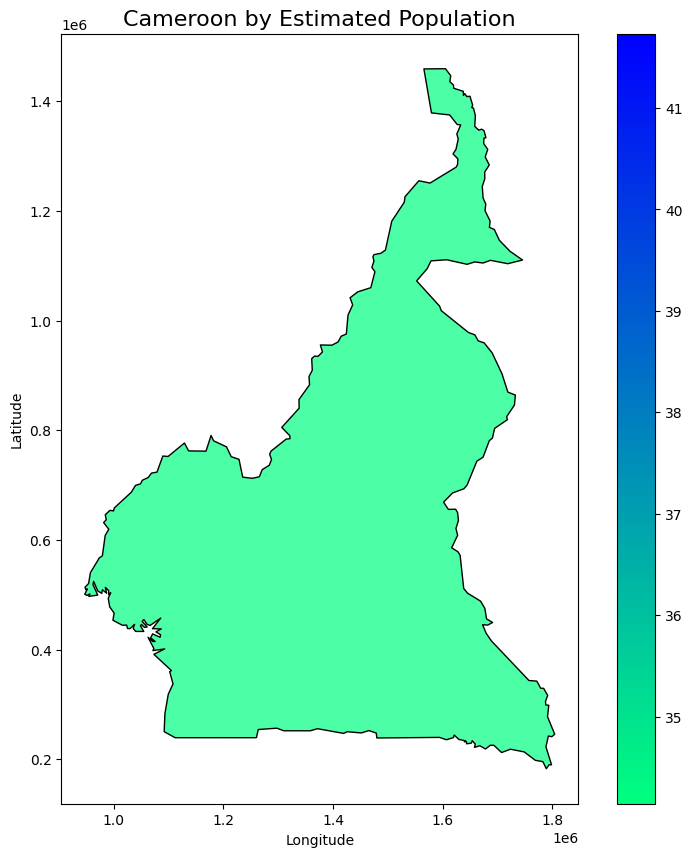

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame (assuming it's already in the variable gdf)
# gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Specify the country you want to display
country_name = 'CMR'  # Change this to the ISO_A3 code of the country you want to display, e.g., 'KEN' for Kenya

# Filter the GeoDataFrame for the selected country
country_data = gdf[gdf['ISO_A3'] == country_name]

# Check if country_data is empty
if country_data.empty:
    print(f"No data found for country code: {country_name}")
else:
    # Reproject to a suitable projected CRS for accurate plotting
    country_data = country_data.to_crs(epsg=3395)  # World Mercator projection

    # Plotting the selected country
    fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
    country_data.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
    country_data.plot(column='Shape_Area', ax=ax, legend=True, cmap='winter_r', alpha=0.7)  # Color by area

    # Adding title and labels
    plt.title(f'{country_data["NAME_EN"].values[0]} by Estimated Population', fontsize=16)  # Use the NAME_EN column
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Remove the grid
    ax.grid(False)  # or use plt.grid(False)

    # Show the plot
    plt.show()

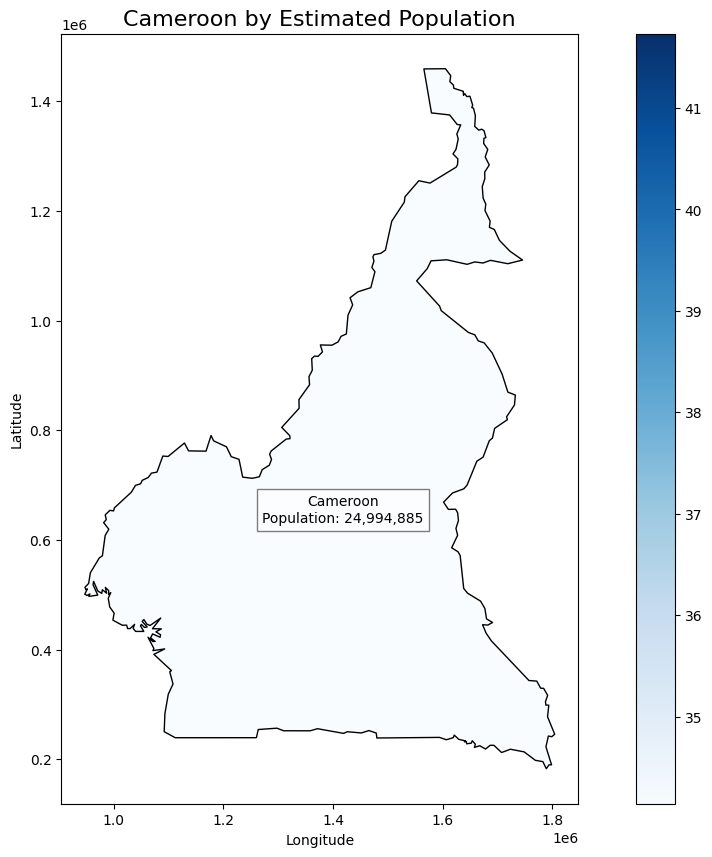

In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame (assuming it's already in the variable gdf)
# gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Specify the country you want to display
country_name = 'CMR'  # Change this to the ISO_A3 code of the country you want to display, e.g., 'KEN' for Kenya

# Filter the GeoDataFrame for the selected country
country_data = gdf[gdf['ISO_A3'] == country_name]

# Check if country_data is empty
if country_data.empty:
    print(f"No data found for country code: {country_name}")
else:
    # Reproject to a suitable projected CRS for accurate plotting
    country_data = country_data.to_crs(epsg=3395)  # World Mercator projection

    # Extract the country name and population estimate
    country_name_display = country_data["NAME_EN"].values[0]
    population_estimate = country_data["POP_EST"].values[0]

    # Plotting the selected country
    fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
    country_data.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
    country_data.plot(column='Shape_Area', ax=ax, legend=True, cmap='Blues', alpha=0.7)  # Color by area

    # Adding title and labels
    plt.title(f'{country_name_display} by Estimated Population', fontsize=16)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Annotate with country name and population estimate
    centroid_x = country_data.geometry.centroid.x.values[0]
    centroid_y = country_data.geometry.centroid.y.values[0]
    ax.text(centroid_x, centroid_y, f'{country_name_display}\nPopulation: {population_estimate:,}', 
            fontsize=10, ha='center', color='black', bbox=dict(facecolor='white', alpha=0.5))

    # Remove the grid
    ax.grid(False)  # or use plt.grid(False)

    # Show the plot
    plt.show()


In [ ]:
"""
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges',
'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r',
'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 
'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r',
'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r',
'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r',
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c','tab20c_r',
'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 
'viridis_r', 'winter', 'winter_r'
"""

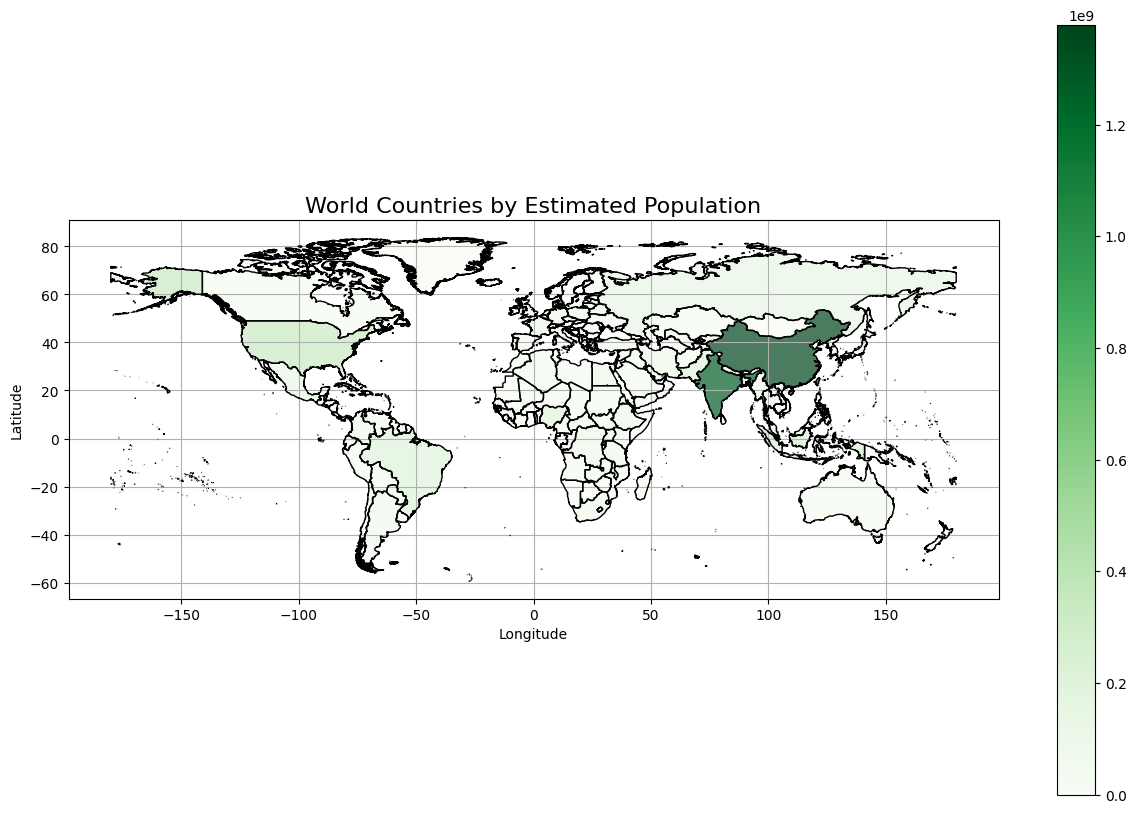

In [111]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame (assuming it's already in the variable gdf)
# gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Plotting the geometries
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
gdf.plot(column='POP_EST', ax=ax, legend=True, cmap='Greens', alpha=0.7)  # Color by population estimate -  cmap='OrRd  BuGn

# Adding title and labels
plt.title('World Countries by Estimated Population', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show the plot
plt.show()


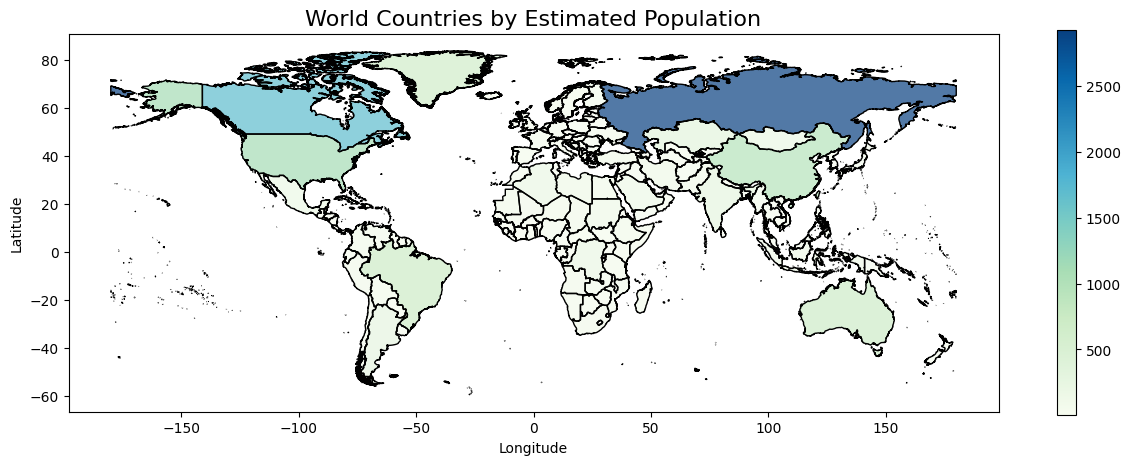

In [106]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame (assuming it's already in the variable gdf)
# gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Plotting the geometries
fig, ax = plt.subplots(figsize=(15, 5))  # Adjust the size as needed
gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
gdf.plot(column='Shape_Area', ax=ax, legend=True, cmap='GnBu', alpha=0.7)  # Color by population estimate

# Adding title and labels
plt.title('World Countries by Estimated Population', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove the grid
ax.grid(False)  # or use plt.grid(False)

# Show the plot
plt.show()


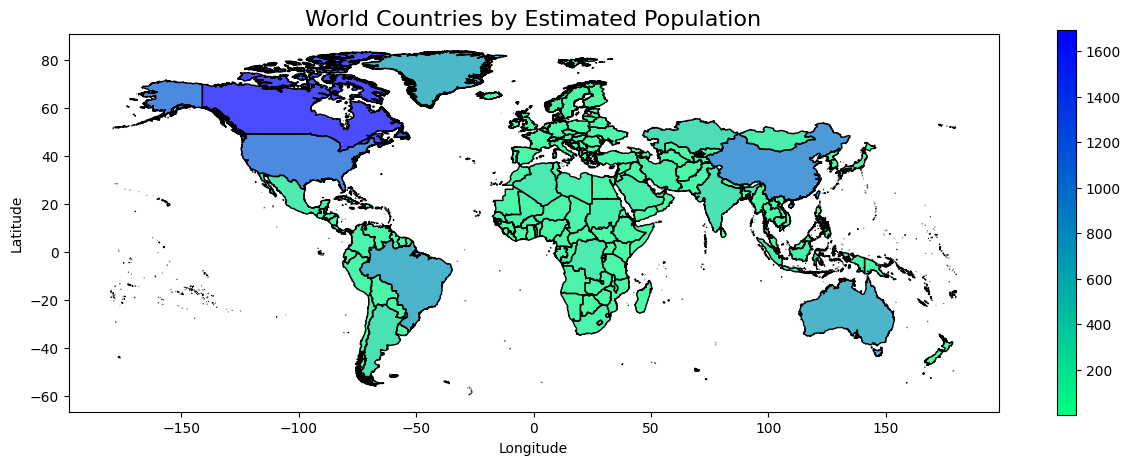

In [56]:
 # gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Specify the country you want to exclude
country_name = 'RUS'  # Change this to your target country ISO_A3 code
# country_name = 'Russia'  # If using country name, uncomment this line

# Exclude the specified country from the GeoDataFrame
gdf_filtered = gdf[gdf['ISO_A3'] != country_name]
# gdf_filtered = gdf[gdf['NAME_VI'] != country_name]  # If using country name, uncomment this line


# Plotting the geometries
fig, ax = plt.subplots(figsize=(15, 5))  # Adjust the size as needed
gdf_filtered.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
gdf_filtered.plot(column='Shape_Area', ax=ax, legend=True, cmap='winter_r', alpha=0.7)  # Color by population estimate

# Adding title and labels
plt.title('World Countries by Estimated Population', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove the grid
ax.grid(False)  # or use plt.grid(False)

# Show the plot
plt.show()

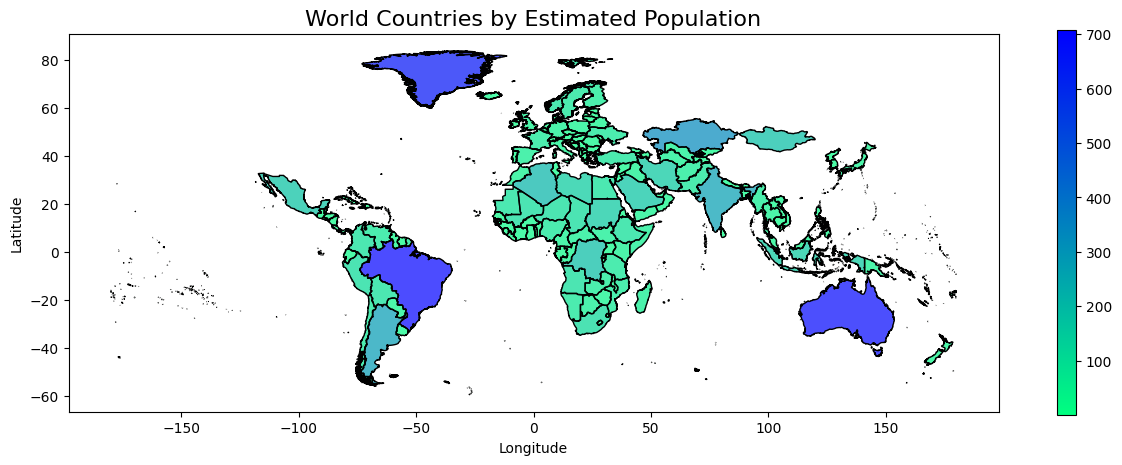

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame (assuming it's already in the variable gdf)
# gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Specify the countries you want to exclude by their ISO_A3 codes
excluded_countries = ['RUS', 'CAN', 'USA', 'CHN']  # ISO_A3 codes for Russia, Canada, USA, and China

# Exclude the specified countries from the GeoDataFrame
gdf_filtered = gdf[~gdf['ISO_A3'].isin(excluded_countries)]

# Plotting the geometries
fig, ax = plt.subplots(figsize=(15, 5))  # Adjust the size as needed
gdf_filtered.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
gdf_filtered.plot(column='Shape_Area', ax=ax, legend=True, cmap='winter_r', alpha=0.7)  # Color by population estimate

# Adding title and labels
plt.title('World Countries by Estimated Population', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove the grid
ax.grid(False)  # or use plt.grid(False)

# Show the plot
plt.show()

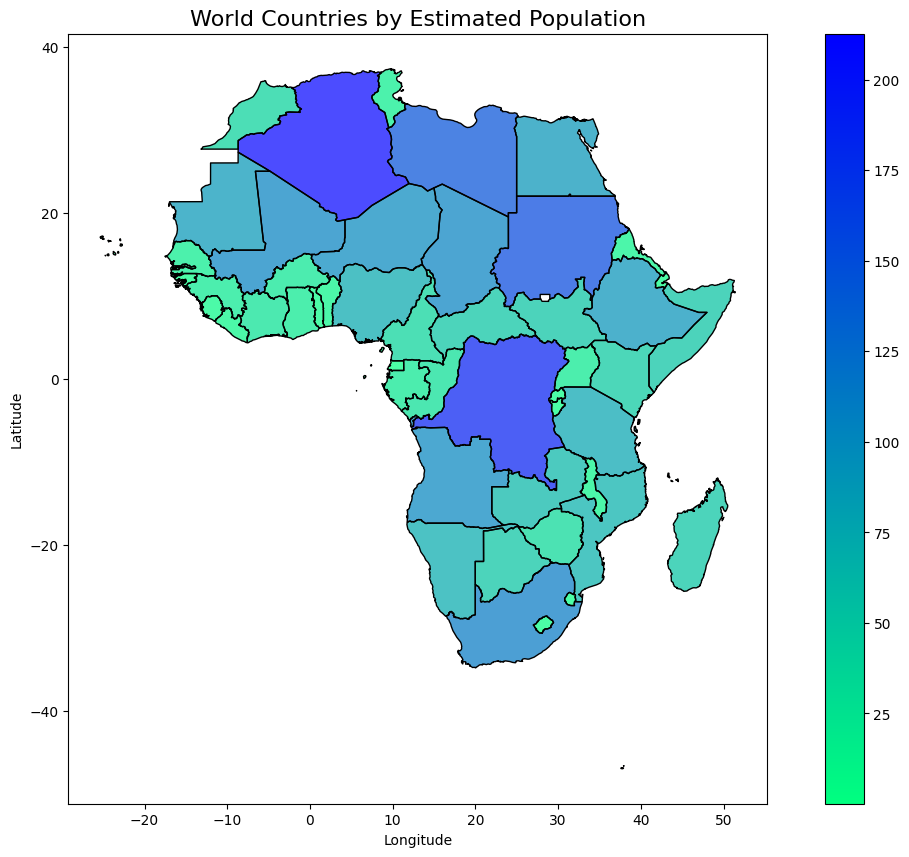

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame (assuming it's already in the variable gdf)
# gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Filter the GeoDataFrame for African countries
africa_countries = gdf[gdf['CONTINENT'] == 'Africa']  # Ensure you have a 'CONTINENT' column

# Exclude specific countries if needed
excluded_countries = ['RUS', 'CAN', 'USA', 'CHN']  # ISO_A3 codes to exclude
africa_countries = africa_countries[~africa_countries['ISO_A3'].isin(excluded_countries)]

# Plotting the geometries
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
africa_countries.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
africa_countries.plot(column='Shape_Area', ax=ax, legend=True, cmap='winter_r', alpha=0.7)  # Color by population estimate

# Adding title and labels
plt.title('World Countries by Estimated Population', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove the grid
ax.grid(False)  # or use plt.grid(False)

# Show the plot
plt.show()


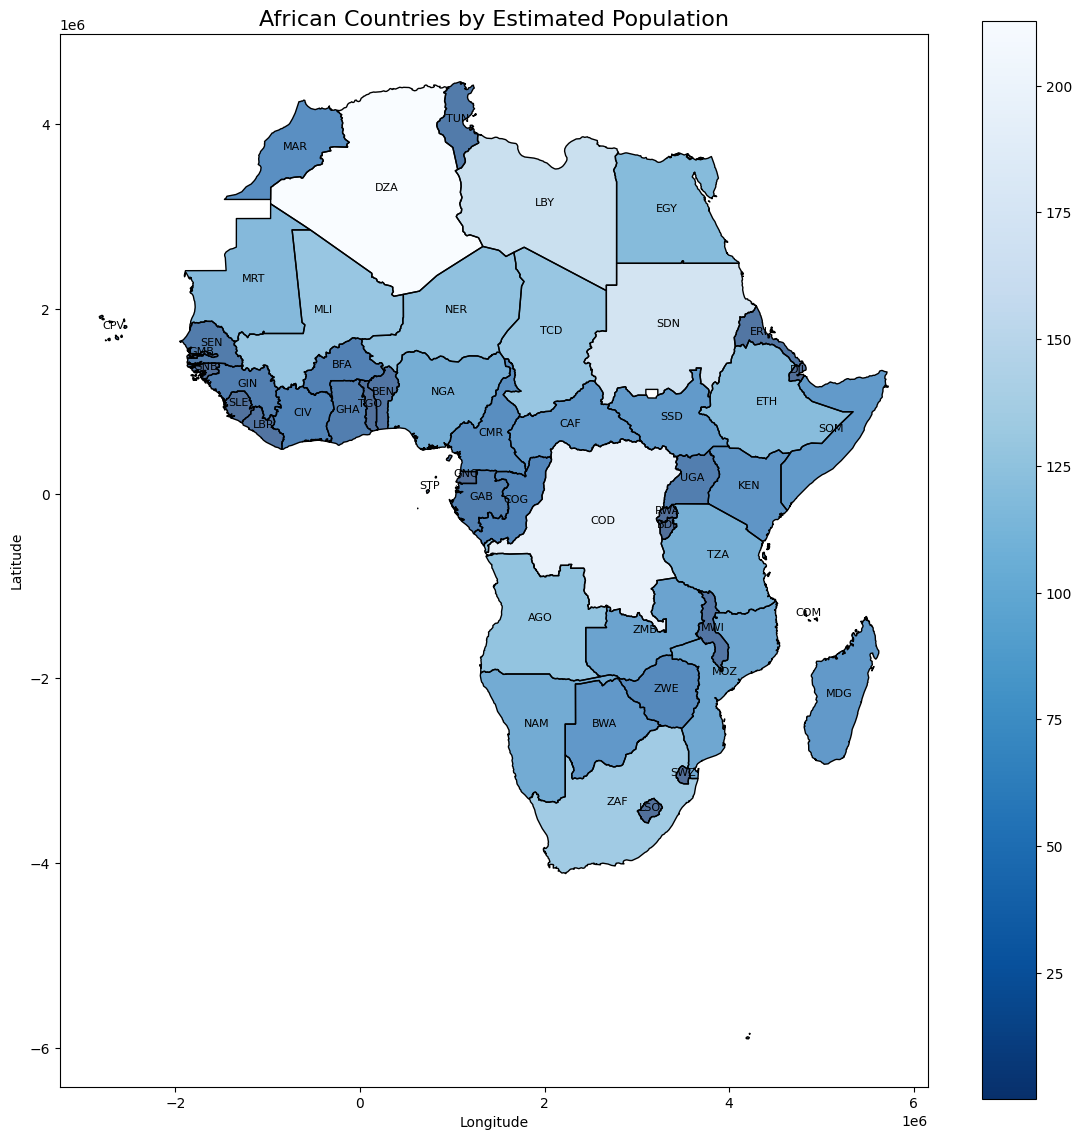

In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your GeoDataFrame (assuming it's already in the variable gdf)
# gdf = gpd.read_file('path_to_your_file.geojson')  # Uncomment if you need to load it

# Filter the GeoDataFrame for African countries
africa_countries = gdf[gdf['CONTINENT'] == 'Africa']  # Ensure you have a 'CONTINENT' column

# Exclude specific countries if needed
excluded_countries = ['RUS', 'CAN', 'USA', 'CHN']  # ISO_A3 codes to exclude
africa_countries = africa_countries[~africa_countries['ISO_A3'].isin(excluded_countries)]

# Reproject to a suitable projected CRS for accurate centroid calculation
africa_countries = africa_countries.to_crs(epsg=3395)  # World Mercator projection

# Plotting the geometries
fig, ax = plt.subplots(figsize=(14, 14))  # Adjust the size as needed
africa_countries.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot country boundaries
africa_countries.plot(column='Shape_Area', ax=ax, legend=True, cmap='Blues_r', alpha=0.7)  # Color by area or population estimate

# Adding ISO country codes as labels
for x, y, label in zip(africa_countries.geometry.centroid.x, 
                       africa_countries.geometry.centroid.y, 
                       africa_countries['ISO_A3']):
    ax.annotate(label, xy=(x, y), color='black', fontsize=8, ha='center')

# Adding title and labels
plt.title('African Countries by Estimated Population', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove the grid
ax.grid(False)  # or use plt.grid(False)

# Show the plot
plt.show()



In [15]:
#!pip install bokeh